initial weights: [0, 0, 0]
----------------------------------------Epoch 1----------------------------------------
Iteration 1    <w, x> = 0        y<w, x> = 0        update🌈 : [1, 0, 1]
Iteration 2    <w, x> = 1        y<w, x> = 1        no update: [1, 0, 1]
Iteration 3    <w, x> = 2        y<w, x> = -2       update🌈 : [0, -1, 0]
Iteration 4    <w, x> = 0        y<w, x> = 0        update🌈 : [-1, -1, 0]
----------------------------------------Epoch 2----------------------------------------
Iteration 1    <w, x> = -1       y<w, x> = -1       update🌈 : [0, -1, 1]
Iteration 2    <w, x> = -1       y<w, x> = -1       update🌈 : [1, 0, 1]
Iteration 3    <w, x> = 2        y<w, x> = -2       update🌈 : [0, -1, 0]
Iteration 4    <w, x> = 0        y<w, x> = 0        update🌈 : [-1, -1, 0]
----------------------------------------Epoch 3----------------------------------------
Iteration 1    <w, x> = -1       y<w, x> = -1       update🌈 : [0, -1, 1]
Iteration 2    <w, x> = -1       y<w, x> = -1       

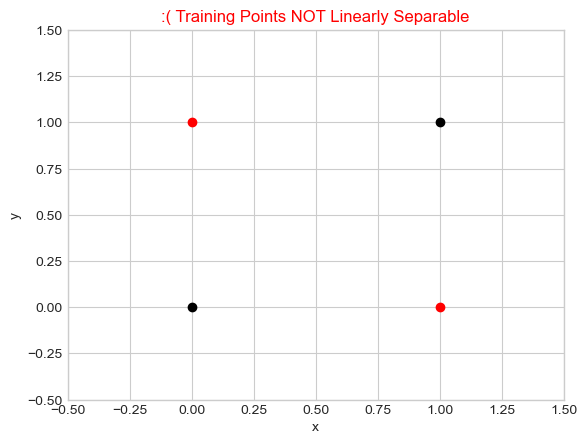

In [59]:
# Perceptron Learning Algorithm
# -----------------------------------------------------------------------------

# input data
curr_weights = [int(_) for _ in """ 0 0 0 """.split()]
learning_rate = 1

training_data = [[int(__) for __ in _.split()] for _ in
"""
0 1 1,
1 0 1,
1 1 -1,
0 0 -1
""".split(',')]

# lab3 q2
toy_dataset_1 = \
"""
-2 -1 -1,
2 -1 1,
1 1 1,
-1 -1 -1,
3 2 1
"""

# xor func
toy_dataset_2 = \
"""
0 1 1,
1 0 1,
1 1 -1,
0 0 -1
"""

# -----------------------------------------------------------------------------

# train perceptron
def draw_2d_train_points():
    import matplotlib.pyplot as plt
    ax = plt.axes()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # Compute the centroid of the points
    centroid_x = sum(instance[0] for instance in training_data) / len(
        training_data)
    centroid_y = sum(instance[1] for instance in training_data) / len(
        training_data)
    # Compute the max distance from the centroid to the points
    max_distance = max(
        max(abs(instance[0] - centroid_x), abs(instance[1] - centroid_y)) for
        instance in training_data)
    # Set the limits of x and y axis
    ax.set_xlim(centroid_x - max_distance * 2,
                centroid_x + max_distance * 2)
    ax.set_ylim(centroid_y - max_distance * 2,
                centroid_y + max_distance * 2)
    ax.set_title(':( Training Points NOT Linearly Separable', color='red')
    for instance in training_data:
        if instance[-1] == 1:
            ax.scatter(instance[0], instance[1], c='r', marker='o')
        else:
            ax.scatter(instance[0], instance[1], c='black', marker='o')
    plt.show()


if training_data[-1] == []: training_data.pop()
print(f'initial weights: {curr_weights}')
ok_lis = []
epoch = 1
linearly_separable_count = 0
linearly_separable_flag = True
while len(ok_lis) < len(training_data):
    if linearly_separable_count == 3000:
        print("Not linearly separable")
        linearly_separable_flag = False
        draw_2d_train_points()
        break
    ok_lis = []
    print(f"{'-'*40}Epoch {epoch}{'-'*40}")
    for idx, instance in enumerate(training_data):
        w_x = curr_weights[0] + sum([curr_weights[i] * instance[i-1] for i in
                                     range(1, len(curr_weights))])
        y_w_x = instance[-1] * w_x
        print("Iteration {:<4} <w, x> = {:<8} y<w, x> = {:<8}". \
              format(idx + 1, round(w_x, 2), round(y_w_x, 2)), end=' ')
        if round(y_w_x, 2) <= 0:
            curr_weights[0] += learning_rate * instance[-1]
            curr_weights[0] = round(curr_weights[0], 2)
            for i in range(1, len(curr_weights)):
                curr_weights[i] += (learning_rate * instance[-1] *
                                    instance[i-1])
                curr_weights[i] = round(curr_weights[i], 2)
            print(f"update🌈 : {curr_weights}")
        else:
            ok_lis.append(idx + 1)
            print(f"no update: {curr_weights}")
    epoch += 1
    linearly_separable_count += 1

# -----------------------------------------------------------------------------

# plot result
if len(training_data[0]) == 3 and linearly_separable_flag:
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure();ax = plt.axes();ax.set_xlabel('x');ax.set_ylabel('y')
    ax.set_title('Perceptron Learning Algorithm (2D)')

    # Compute the centroid of the points
    centroid_x = sum(instance[0] for instance in training_data) / len(
        training_data)
    centroid_y = sum(instance[1] for instance in training_data) / len(
        training_data)
    # Compute the max distance from the centroid to the points
    max_distance = max(
        max(abs(instance[0] - centroid_x), abs(instance[1] - centroid_y)) for
        instance in training_data)

    x = np.linspace(centroid_x - max_distance * 2, centroid_x + max_distance *
                    2, 100)
    y = np.linspace(centroid_x - max_distance * 2, centroid_x + max_distance *
                    2, 100)
    X, Y = np.meshgrid(x, y)
    Z = curr_weights[0] + curr_weights[1] * X + curr_weights[2] * Y
    ax.contour(X, Y, Z, 0, colors='gold')
    for instance in training_data:
        if instance[-1] == 1:ax.scatter(instance[0], instance[1], c='r',
                                        marker='o')
        else:ax.scatter(instance[0], instance[1], c='black', marker='o')
    plt.show()
